In [87]:
import time
import requests

def api_call(url: str, method = requests.get) -> [requests.Response | None]:
    ''' Wrapper for API call which catch all errors and return response'''
    
    try:
        return method(url)
    except:
        pass
        
    return None

def print_response_result_function(response: requests.Response):
    print(response.status_code, response.reason, response.text)

def measure(measured_function, result_function):
    start = time.time()
    # your code...
    result = measured_function()
    # end of you code
    end = time.time()
    
    diff_time = end - start
    
    print(diff_time) # time in seconds
    
    if result_function:
        result_function(result)
        
    return diff_time


def get_dotnet_members():
    return api_call('http://localhost:5028/Member', requests.get)

def get_django_collisions():
    return api_call('http://localhost:8000/collisions', requests.get)

In [96]:
data = {
    'Dotnet': measure(get_dotnet_members, print_response_result_function),
    'Django': measure(get_django_collisions, print_response_result_function)
}

0.023979663848876953
200 OK [{"id":1,"name":"Ania"},{"id":2,"name":"Iga"},{"id":4,"name":"string"}]
0.06204557418823242
200 OK []


In [109]:
import matplotlib.pyplot as plt

def plot_bar_plot(data, xlabel, ylabel, title):
    courses = list(data.keys())
    values = list(data.values())
    
    plt.figure(figsize = (5, 2))
    
    # creating the bar plot
    plt.bar(courses, values, color ='maroon',
            width = 0.4)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


0.021719694137573242
200 OK [{"id":1,"name":"Ania"},{"id":2,"name":"Iga"},{"id":4,"name":"string"}]
0.07537078857421875
200 OK []


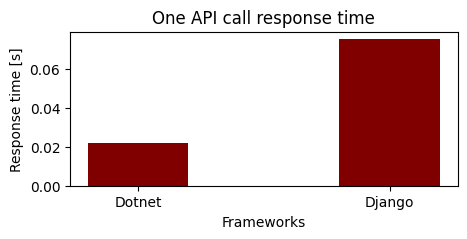

In [110]:
data = {
    'Dotnet': measure(get_dotnet_members, print_response_result_function),
    'Django': measure(get_django_collisions, print_response_result_function)
}
plot_bar_plot(data, xlabel="Frameworks", ylabel="Response time [s]", title="One API call response time")